# Neutrino oscillations in matter

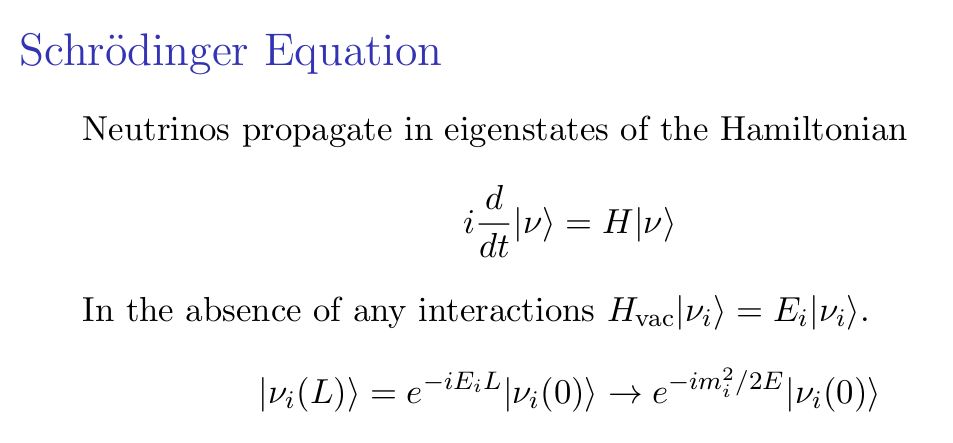

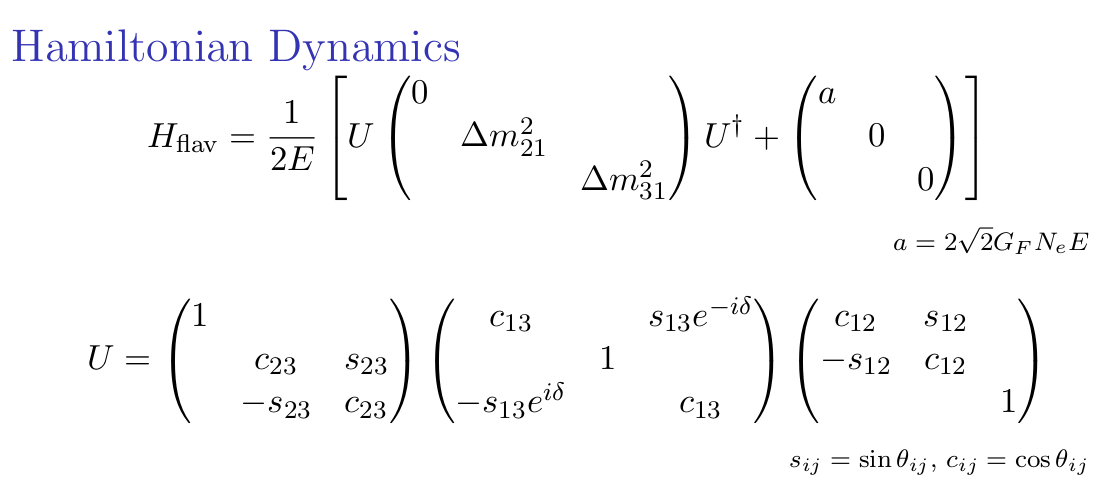

# Task: Hamiltonian simulation
- Need to simulate 
# $\exp(-iHt)$, ($H = H_{flav}$)
- Remark: H is Hermitian
+ H is real if $\delta=0$
+ H is complex if $\delta \neq 0$

# Method 1: Trotterization
Split: $H = H_0 + H_1$, where $H_0$ is diagonal Hamiltonian in vacuum, H_1 is the diagonal matrix
- Trotter fomula:
# $\exp(-iHt) =  \exp(-i(H_0+H_1)t)$ ~ $(\exp(-iH_0t/n)\exp(-iH_1t/n))^n$
# $=(U_0(\frac{t}{n})U_1(\frac{t}{n}))^n$

# $U_0(t) = U_{PMNS}\Lambda(t)U_{PMNS}^\dagger \rightarrow$ single qutrit gate
# $U_1 = P_0(\phi) = diag(\exp(i\phi), 1, 1)\rightarrow$ virtual phase gate

# Method 2: 
- Step 1: Calculate eigenvalues from quantum algorithms: QPE, VQE, ...
- Step 2: Eigenvectors from eigen values
- Step 3: Calculate oscillation probabilities

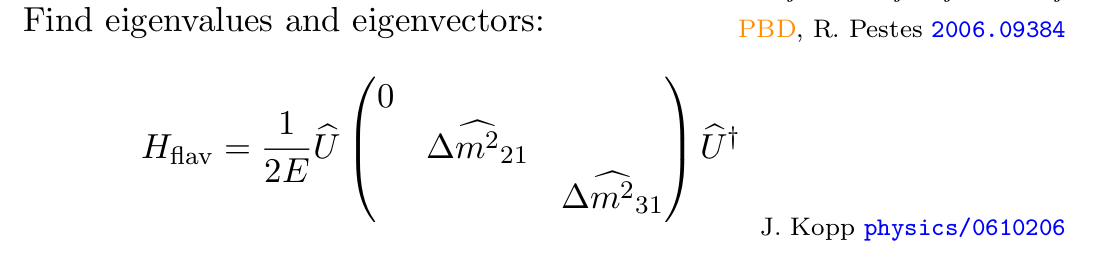

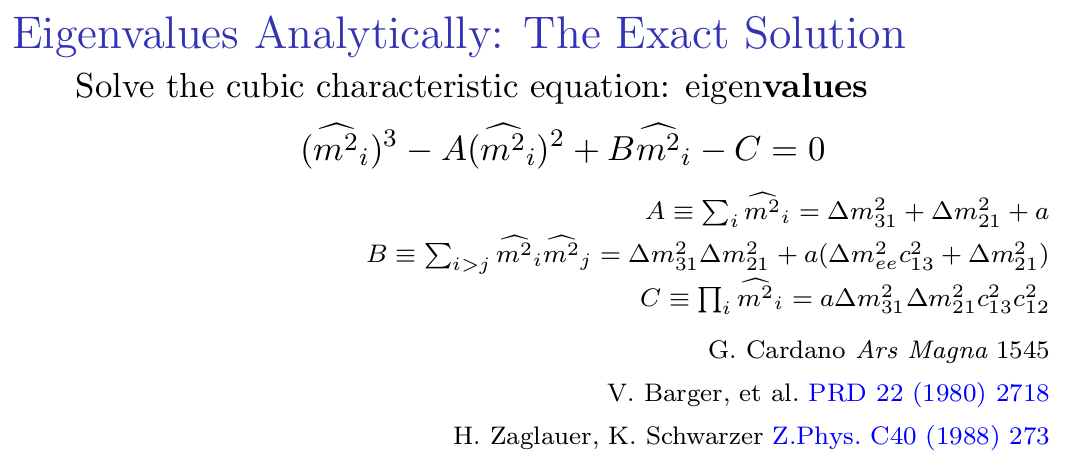

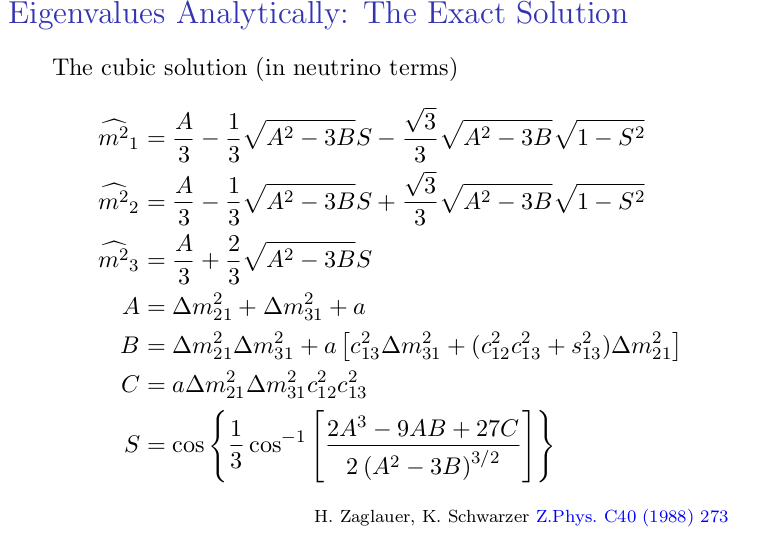

Other approaches: 
- Rotation by quantum gates
- quantum version of Jacobi diagonalization?
- etc

# Let's see Trotterization fomula with matmul first

In [1]:
# import qiskit as qs
import numpy as np

In [2]:
def P0(phi):
    P0 = np.array([[exp(-1j*phi) , 0                 , 0],
                      [0                  , 1 , 0],
                      [0                  , 0                 , 1]])
    return P0

def P2(phi):
    P2 = np.array([[1 , 0                  , 0                ],
                      [0 , 1 , 0                ],
                      [0 , 0                  , exp((1j*phi))]])
    return P2    

In [3]:
pi = np.pi
cos = np.cos
sin = np.sin
exp = np.exp
sqrt = np.sqrt
def Rx_01(theta):
    Rx_01 = np.array([[cos(theta/2)     , -1j*sin(theta/2) , 0],
                      [-1j*sin(theta/2) , cos(theta/2)     , 0],
                      [0                , 0                , 1]])
    return Rx_01

def Rx_12(theta):
    Rx_12 = np.array([[1 , 0                , 0               ],
                      [0 , cos(theta/2)     , -1j*sin(theta/2)],
                      [0 , -1j*sin(theta/2) , cos(theta/2)    ]])
    return Rx_12

def Ry_01(theta):
    Ry_01 = np.array([[cos(theta/2) , -sin(theta/2) , 0],
                      [sin(theta/2) , cos(theta/2)  , 0],
                      [0            , 0             , 1]])
    return Ry_01

def Ry_12(theta):
    Ry_12 = np.array([[1 , 0            , 0            ],
                      [0 , cos(theta/2) , -sin(theta/2)],
                      [0 , sin(theta/2) , cos(theta/2) ]])
    return Ry_12
    
def Rz_01(theta):
    Rz_01 = np.array([[exp((-1j*theta)/2) , 0                 , 0],
                      [0                  , exp((1j*theta)/2) , 0],
                      [0                  , 0                 , 1]])
    return Rz_01
def Rz_12(theta):
    Rz_12 = np.array;([[1 , 0                  , 0                ],
                      [0 , exp((-1j*theta)/2) , 0                ],
                      [0 , 0                  , exp((1j*theta)/2)]])
    return Rz_12

t12 = np.radians(33.45)
t23 = np.radians(42.1)
t13 = np.radians(8.62)
D21 = 7.42*1e-5
D31 = 2.510*1e-3 #
D32 = D31-D21 ###
# Now gate simulator
c12 = cos(t12)
s12 = sin(t12)
c13 = cos(t13)
s13 = sin(t13)
c23 = cos(t23)
s23 = sin(t23)

In [4]:
dCP = 0
# U1 is the PMNS matrix
U1 = np.array([[c12*c13            , s12*c13             , s13*exp(-1j*dCP)],
               [-s12*c23-c12*s23*s13*exp(1j*dCP), c12*c23-s12*s23*s13*exp(1j*dCP) , s23*c13 ],
               [s12*s23-c12*c23*s13*exp(1j*dCP) , -c12*s23-s12*c23*s13*exp(1j*dCP), c23*c13 ]])
U1d = U1.conj().T # conjugate transpose
# U Gate decomposition of U1
V0 = Rx_12(2*t23-pi)@Rx_01(2*t13)@Rx_12(pi)@Rx_01(2*t12)
Vd = Rx_01(-2*t12)@Rx_12(-pi)@Rx_01(-2*t13)@Rx_12(pi-2*t23)

In [5]:
trace = np.trace(U1)
trace

(2.1222294849004486+0j)

In [6]:
import numpy as np
from scipy.linalg import gell_mann

# Function to calculate the coefficients of a Hermitian matrix in the Gell-Mann basis
def gell_mann_coefficients(matrix):
    gell_mann_matrices = gell_mann()
    trace_H = np.trace(matrix)
    coefficients = [(2/trace_H) * np.real(np.trace(np.matmul(matrix, gm))) for gm in gell_mann_matrices]
    return coefficients

# Example Hermitian matrix (replace this with your own matrix)
hermitian_matrix = np.array([[1+0j, 2+1j, 3+2j],
                             [2-1j, 4+0j, 5+3j],
                             [3-2j, 5-3j, 6+0j]])

# Calculate the coefficients in the Gell-Mann basis
coefficients = gell_mann_coefficients(hermitian_matrix)

# Print the coefficients
for i, coeff in enumerate(coefficients):
    print(f"Coefficient a{i+1}: {coeff:.4f}")


ImportError: cannot import name 'gell_mann' from 'scipy.linalg' (/Users/hanguyenc11/anaconda3/lib/python3.10/site-packages/scipy/linalg/__init__.py)

In [7]:
import numpy as np

# Define the Gell-Mann matrices manually
lambda1 = np.array([[0, 1, 0],
                    [1, 0, 0],
                    [0, 0, 0]])

lambda2 = np.array([[0, -1j, 0],
                    [1j, 0, 0],
                    [0, 0, 0]])

lambda3 = np.array([[1, 0, 0],
                    [0, -1, 0],
                    [0, 0, 0]])

lambda4 = np.array([[0, 0, 1],
                    [0, 0, 0],
                    [1, 0, 0]])

lambda5 = np.array([[0, 0, -1j],
                    [0, 0, 0],
                    [1j, 0, 0]])

lambda6 = np.array([[0, 0, 0],
                    [0, 0, 1],
                    [0, 1, 0]])

lambda7 = np.array([[0, 0, 0],
                    [0, 0, -1j],
                    [0, 1j, 0]])

lambda8 = (1/np.sqrt(3)) * np.array([[1, 0, 0],
                                     [0, 1, 0],
                                     [0, 0, -2]])

gell_mann_matrices = [lambda1, lambda2, lambda3, lambda4, lambda5, lambda6, lambda7, lambda8]
lamd = [np.eye(3), lambda1, lambda2, lambda3, lambda4, lambda5, lambda6, lambda7, lambda8]
 
# Function to calculate the coefficients of a Hermitian matrix in the Gell-Mann basis
def gell_mann_coefficients(matrix):
    U00 = matrix[0][0]; U01 = matrix[0][1]; U02 = matrix[0][2]
    U10 = matrix[1][0]; U11 = matrix[1][1]; U12 = matrix[1][2]
    U20 = matrix[2][0]; U21 = matrix[2][1]; U22 = matrix[2][2]
    x0 = 1/3*(U00+U11+U22)
    x1 = 0.5*(U01+U10)
    x2 = 1j/2*(U01-U10)
    x3 = 1/2*(U00-U11)
    x4 = 1/2*(U02+U20)
    x5 = 1j/2*(U02-U20)
    x6 = 1/2*(U12+U21)
    x7 = 1j/2*(U12-U21)
    x8 = 1/np.sqrt(3)*(1/2*U00+1/2*U11-U22)
    coefficients = [x0,x1,x2,x3,x4,x5,x6,x7,x8]
    return coefficients

# Example Hermitian matrix (replace this with your own matrix)
hermitian_matrix = np.array([[1+0j, 2+1j, 3+2j],
                             [2-1j, 4+0j, 5+3j],
                             [3-2j, 5-3j, 6+0j]])

# Calculate the coefficients in the Gell-Mann basis
coefficients = gell_mann_coefficients(hermitian_matrix)

# Print the coefficients
for i, coeff in enumerate(coefficients):
    print(f"Coefficient a{i+1}: {coeff:.4f}")


Coefficient a1: 3.6667+0.0000j
Coefficient a2: 2.0000+0.0000j
Coefficient a3: -1.0000+0.0000j
Coefficient a4: -1.5000+0.0000j
Coefficient a5: 3.0000+0.0000j
Coefficient a6: -2.0000+0.0000j
Coefficient a7: 5.0000+0.0000j
Coefficient a8: -3.0000+0.0000j
Coefficient a9: -2.0207+0.0000j


In [8]:
i3 = np.array([[1, 0, 0],[0, 1, 0], [0, 0, 1]])

In [9]:
np.eye(3) - i3

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [10]:
np.round(coefficients[0]*i3+coefficients[1]*lambda1+coefficients[2]*lambda2+coefficients[3]*lambda3+coefficients[4]*lambda4+coefficients[5]*lambda5+coefficients[6]*lambda6+coefficients[7]*lambda7+coefficients[8]*lambda8, 3)

array([[1.+0.j, 2.+1.j, 3.+2.j],
       [2.-1.j, 4.+0.j, 5.+3.j],
       [3.-2.j, 5.-3.j, 6.+0.j]])

In [12]:
# import numpy as np
# from scipy.linalg import sqrtm

# def calculate_gell_mann_coefficients(matrix):
#     # Check if the input matrix is Hermitian
#     if not np.allclose(matrix, matrix.conj().T):
#         raise ValueError("Input matrix is not Hermitian!")

#     # Get the Gell-Mann matrices
#     gell_mann_matrices = np.array([
#         # Gell-Mann matrices (Pauli matrices)
#         [[0, 1, 0], [1, 0, 0], [0, 0, 0]],
#         [[0, -1j, 0], [1j, 0, 0], [0, 0, 0]],
#         [[1, 0, 0], [0, -1, 0], [0, 0, 0]],
#         # Gell-Mann matrices (off-diagonal)
#         [[0, 0, 1], [0, 0, 0], [1, 0, 0]],
#         [[0, 0, -1j], [0, 0, 0], [1j, 0, 0]],
#         [[0, 0, 0], [0, 0, 1], [0, 1, 0]],
#         [[0, 0, 0], [0, 0, -1j], [0, 1j, 0]],
#         # Gell-Mann matrices (diagonal)
#         [[1 / np.sqrt(3), 0, 0], [0, 1 / np.sqrt(3), 0], [0, 0, -2 / np.sqrt(3)]]
#     ])

#     # Calculate coefficients for Gell-Mann matrices
#     coefficients = []
#     for gell_mann_matrix in gell_mann_matrices:
#         coeff = np.trace(np.dot(matrix, gell_mann_matrix)) / 2
#         coefficients.append(coeff)

#     return coefficients

# # Example usage:
# # Define a 3x3 Hermitian matrix
# hermitian_matrix = np.array([
#     [2, 1 + 2j, 0],
#     [1 - 2j, 5, 3],
#     [0, 3, -3]
# ], dtype=np.complex64)

# # Calculate coefficients for the decomposition
# coefficients = calculate_gell_mann_coefficients(hermitian_matrix)
# print("Coefficients (u_k):", coefficients)


Coefficients (u_k): [(1+0j), (-2+0j), (-1.5+0j), 0j, 0j, (3+0j), 0j, (3.752776749732568+0j)]


In [11]:
from scipy.linalg import expm, sinm, cosm

In [12]:
np.round(expm(-1j/2*pi*lambda1), 3)

array([[0.+0.j, 0.-1.j, 0.+0.j],
       [0.-1.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j]])

In [13]:
np.round(expm(-1j/2*pi*lambda2), 3)

array([[ 0.+0.j, -1.+0.j,  0.+0.j],
       [ 1.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  1.+0.j]])

In [14]:
def r0(th):
    r = expm(-1j/2*th*lambda0)
    return r
def r1(th):
    r = expm(-1j/2*th*lambda1)
    return r
def r2(th):
    r = expm(-1j/2*th*lambda2)
    return r
def r3(th):
    r = expm(-1j/2*th*lambda3)
    return r
def r4(th):
    r = expm(-1j/2*th*lambda4)
    return r
def r5(th):
    r = expm(-1j/2*th*lambda5)
    return r
def r6(th):
    r = expm(-1j/2*th*lambda6)
    return r
def r7(th):
    r = expm(-1j/2*th*lambda7)
    return r
def r8(th):
    r = expm(-1j/2*th*lambda8)
    return r

In [15]:
expm(-1j*pi*lambda2)

array([[-1.00000000e+00+0.j, -1.52695104e-16+0.j,  0.00000000e+00+0.j],
       [ 1.52695104e-16+0.j, -1.00000000e+00+0.j,  0.00000000e+00+0.j],
       [ 0.00000000e+00+0.j,  0.00000000e+00+0.j,  1.00000000e+00+0.j]])

In [16]:
# np.round(U1 - V0, 3)
dCP

0

In [72]:
from numpy.linalg import matrix_power

def parameters(a):
    Dee = c12**2*D31+s12**2*D32
    Dee_t = Dee*sqrt((cos(2*t13)-a/Dee)**2+sin(2*t13)**2)
    s13t_sq = 0.5*(1-(Dee*cos(2*t13)-a)/Dee_t)
    t13t = np.arcsin(sqrt(s13t_sq))
    a12 = 0.5*(a+Dee-Dee_t)
    D21t = D21*sqrt((cos(2*t12)-a12/D21)**2 + cos(t13-t13t)**2*sin(2*t12)**2)
    s12t_sq = 0.5*(1-(D21*cos(2*t12)-a12)/D21t)
    t12t = np.arcsin(sqrt(s12t_sq))
    D31t = D31+a/4+0.5*(D21t-D21)+0.75*(Dee_t-Dee)
    t23t = t23
    return t23t,t13t, t12t, D21t, D31t

a = 0.001
t23m, t13m, t12m, D21m, D31m = parameters(a)
dCPm = dCP
c12m = cos(t12m)
s12m = sin(t12m)
c13m = cos(t13m)
s13m = sin(t13m)
c23m = cos(t23m)
s23m = sin(t23m)
# flavor_initial = [1/sqrt(2),1/2,1/2] 
# flavor_initial = [0, 1, 0] 
flavor_initial = [1, 0, 0] 


Um = np.array([[c12m*c13m            , s12m*c13m             , s13m*exp(-1j*dCP)],
           [-s12m*c23m-c12m*s23m*s13m*exp(1j*dCP), c12m*c23m-s12m*s23m*s13m*exp(1j*dCP) , s23m*c13m],
           [s12m*s23m-c12m*c23m*s13m*exp(1j*dCP) , -c12m*s23m-s12m*c23m*s13m*exp(1j*dCP), c23m*c13m]])
iUm = Um.conj().T
theoe = []; theom = []; theot = []
theoe_th = []; theom_th = []; theot_th = []

Ge = []; Gm = []; Gt = []

Energy = np.linspace(0.1, 2, 1000)
conL = 5.06773
L = 295*conL
n = 10
for E in Energy:
    evolmatter = np.diag([1, exp(-1j*D21m*L/(2*E)), exp(-1j*L*D31m/(2*E))])
#     evolvac = np.diag([1, exp(-1j*D21*L/(2*E)), exp(-1j*L*D31/(2*E))])
    flavorm = Um@evolmatter@iUm@flavor_initial
    Hm = 1/(2*E)*(U1@np.diag([0, D21, D31])@U1d+np.diag([a, 0, 0]))
    co = gell_mann_coefficients(Hm)
    M = np.eye(3)
    for i in range(0, 9):
        M = expm(-1j*co[i]*lamd[i]*L/n)@M
    U_G = matrix_power(M, n)
    flavorG = U_G@flavor_initial
    probG = list((np.abs(flavorG))**2)
    Ge.append(probG[0])
    Gm.append(probG[1])
    Gt.append(probG[2])
    U_th = expm(-1j*Hm*L)
    
    flavor_th = U_th@flavor_initial
    prob = list((np.abs(flavorm))**2)
    prob_th = list((np.abs(flavor_th))**2)
    
    theoe.append(prob[0])
    theom.append(prob[1])
    theot.append(prob[2])
    theoe_th.append(prob[0])
    theom_th.append(prob[1])
    theot_th.append(prob[2])
    

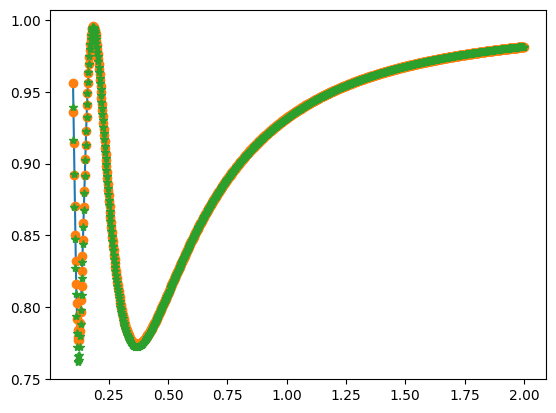

In [73]:
import matplotlib.pyplot as plt

plt.plot(Energy, theoe)
plt.plot(Energy, theoe_th, 'o')
plt.plot(Energy, Ge, '*')

# plt.ylim(-0.001, 0.02)

In [56]:
E = 1; evolvac = np.diag([1, exp(-1j*D21*L/(2*E)), exp(-1j*L*D31/(2*E))])

In [48]:
Hm = (U1@evolvac@U1d)+np.diag([a, 0, 0])

In [67]:
E = 1
evolmatter = np.diag([1, exp(-1j*D21m*L/(2*E)), exp(-1j*L*D31m/(2*E))])

In [71]:
Hm = 1/(2*E)*(U1@np.diag([0,  D21, D31])@U1d+np.diag([a, 0, 0]))
gell_mann_coefficients(Hm)

[(0.0005973666666666666-8.402749491105305e-23j),
 (1.2517095890350372e-05+0j),
 (-0.00012356287855990443+0j),
 (-1.3268380954224745e-05+6.938165771645931e-23j),
 (-1.131006403916923e-05+1.3552527156068805e-20j),
 (-0.00013674974731050658+0j),
 (0.0005975416940572721+0j),
 (2.5573639054768424e-06+0j),
 (-7.774629019152958e-05+2.536733414041824e-23j)]

In [69]:
expm(-1j*Hm*L)-Um@evolmatter@iUm

array([[-0.02545506-0.02598776j, -0.00729031-0.00173138j,
        -0.0061751 -0.00197585j],
       [ 0.00540675+0.00179077j, -0.01622307-0.01657529j,
        -0.0159018 +0.02187829j],
       [ 0.00787702+0.00192219j, -0.0183601 +0.02480754j,
        -0.01970327-0.01183311j]])

In [19]:
import numpy as np
np.linspace(0.1, 2, 20)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ])

In [30]:
from numpy.linalg import matrix_power

def Evol(n, E):
    evol = np.diag([1, exp(-1j*D21*L/(2*E*n)), exp(-1j*L*D31/(2*E*n))])
    return evol

In [31]:
def U0(s):
    U0 = U1@Evol(s, E)@U1d
    return U0

In [46]:
Energysim = np.linspace(0.1, 2, 97)

In [64]:
# Second order 
N = 8
probeT2 = []; probmT2 = []; probtT2 = []
for E in Energysim:
    TrotU = P0(a*L/(4*E*N))@U0(N)@P0(a*L/(4*E*N))
    Simm = matrix_power(TrotU, N)
    probT2 = list((np.abs(Simm@flavor_initial))**2)
    probeT2.append(probT2[0])
    probmT2.append(probT2[1])
    probtT2.append(probT2[2])
# First order
probeT1 = []; probmT1 = []; probtT1 = []
for E in Energysim:
    TrotU = U0(N)@P0(a*L/(2*E*N))
    Simm = matrix_power(TrotU, N)
    probT1 = list((np.abs(Simm@flavor_initial))**2)
    probeT1.append(probT1[0])
    probmT1.append(probT1[1])
    probtT1.append(probT1[2])


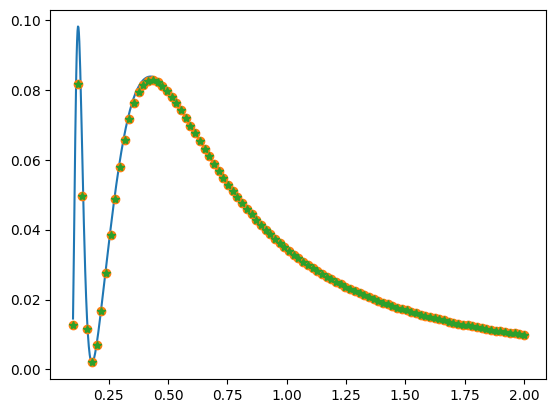

In [65]:
import matplotlib.pyplot as plt

plt.plot(Energy, theoe)
plt.plot(Energysim, probeT1, 'o')
plt.plot(Energysim, probeT2, '*')

# plt.ylim(-0.001, 0.02)

In [34]:
Energysim = Energy

In [52]:
# First order
probeT1 = []; probmT1 = []; probtT1 = []
for E in Energysim:
    N = 5
    TrotU = U0(N)@P0(a*L/(2*E*N))
    Simm = matrix_power(TrotU, N)
    probT1 = list((np.abs(Simm@flavor_initial))**2)
    probeT1.append(probT1[0])
    probmT1.append(probT1[1])
    probtT1.append(probT1[2])


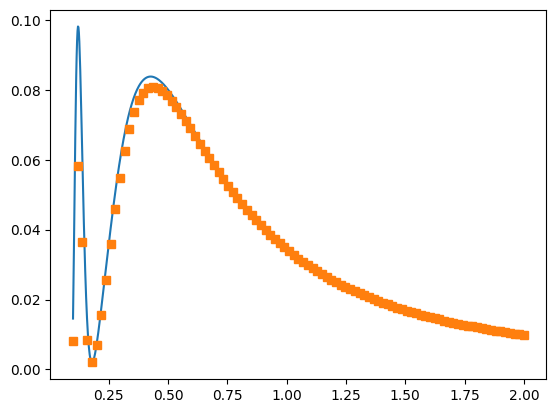

In [50]:
import matplotlib.pyplot as plt

plt.plot(Energy, theoe)
plt.plot(Energysim, probeT1, 's')
# plt.ylim(0, 0.05)

In [71]:
0.98**3

0.9411919999999999

In [167]:
# First order
probe = []; probm = []; probt = []
for E in Energysim:
    N = 5
    TrotU = U0(N)@P0(-a*L/(2*E*N))
    Simm = matrix_power(TrotU, N)
    prob = list((np.abs(Simm@flavor_initial))**2)
    probe.append(prob[0])
    probm.append(prob[1])
    probt.append(prob[2])


In [168]:
# Second order 
probe2 = []; probm2 = []; probt2 = []
for E in Energysim:
    N = 5
    TrotU = P0(-a*L/(4*E*N))@U0(N)@P0(-a*L/(4*E*N))
    Simm = matrix_power(TrotU, N)
    prob = list((np.abs(Simm@flavor_initial))**2)
    probe2.append(prob[0])
    probm2.append(prob[1])
    probt2.append(prob[2])

In [41]:
N = 100
TrotU = P0(-a*L/(2*E*N))@U0(N)
Simm = matrix_power(TrotU, N)
(np.abs(Simm@flavor_initial))**2

array([9.99792853e-01, 9.14952053e-05, 1.15651389e-04])

Text(0.5, 1.0, 'Trotter 5 Steps: 1st vs 2st order')

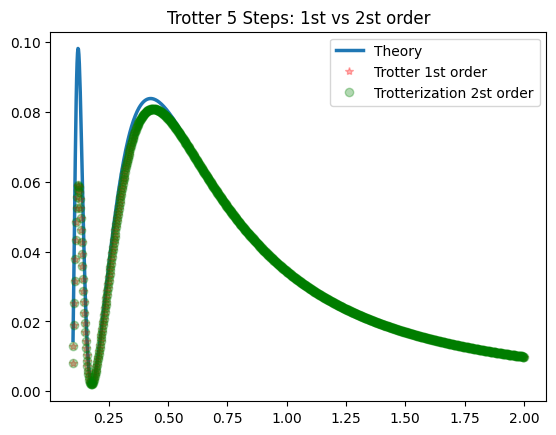

In [172]:
# N = 5
import matplotlib.pyplot as plt


# Your data and plotting code here

plt.plot(Energy, theoe_th, alpha=1,linewidth=2.5)
plt.plot(Energy, probe, 'r*', alpha=0.3)
plt.plot(Energy, probe2, 'go', alpha=0.3)

# Add legends
plt.legend(["Theory","Trotter 1st order","Trotterization 2st order"])

# plt.xscale('log')
# plt.yscale('log')
# plt.ylim(-0.001, 0.02)
plt.title('Trotter 5 Steps: 1st vs 2st order')

Text(0.5, 1.0, 'Trotter 5 Steps')

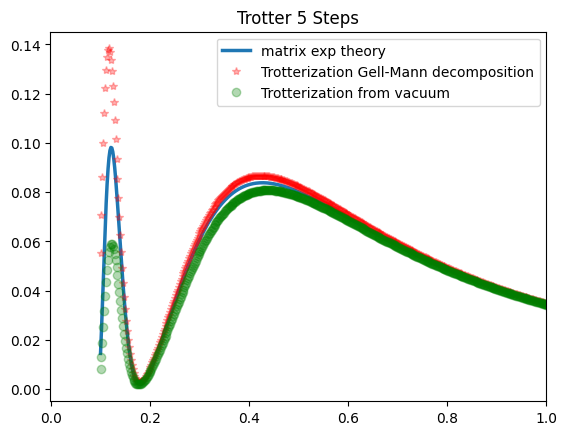

In [165]:
# N = 5
import matplotlib.pyplot as plt


# Your data and plotting code here

plt.plot(Energy, theoe_th, alpha=1,linewidth=2.5)
plt.plot(Energy, Ge, 'r*', alpha=0.3)
plt.plot(Energy, probe, 'go', alpha=0.3)

# Add legends
plt.legend(["matrix exp theory", "Trotterization Gell-Mann decomposition", "Trotterization from vacuum"])

# plt.xscale('log')
# plt.yscale('log')

plt.xlim(-0.001, 1)
# plt.ylim(-0.001, 0.02)
plt.title('Trotter 5 Steps')

(-0.001, 1.0)

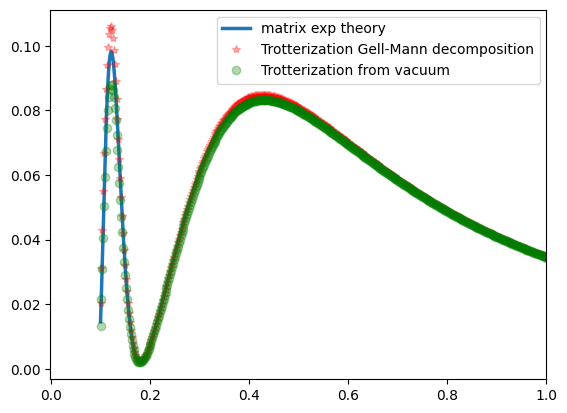

In [159]:
import matplotlib.pyplot as plt


# Your data and plotting code here

plt.plot(Energy, theoe_th, alpha=1,linewidth=2.5)
plt.plot(Energy, Ge, 'r*', alpha=0.3)
plt.plot(Energy, probe, 'go', alpha=0.3)

# Add legends
plt.legend(["matrix exp theory", "Trotterization Gell-Mann decomposition", "Trotterization from vacuum"])

# plt.xscale('log')
# plt.yscale('log')

plt.xlim(-0.001, 1)
# plt.ylim(-0.001, 0.02)

(-0.001, 1.0)

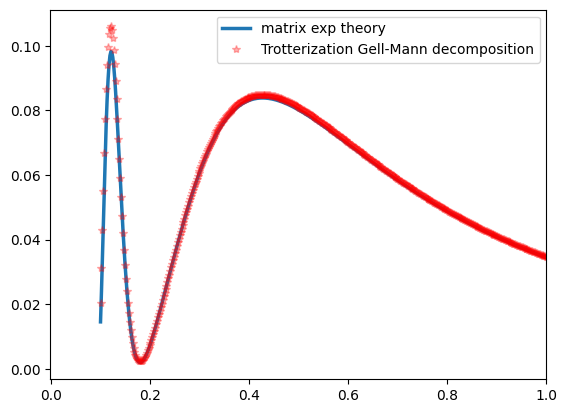

In [160]:
import matplotlib.pyplot as plt


# Your data and plotting code here

plt.plot(Energy, theoe_th, alpha=1,linewidth=2.5)
plt.plot(Energy, Ge, 'r*', alpha=0.3)
# plt.plot(Energy, probe, 'go', alpha=0.3)

# Add legends
plt.legend(["matrix exp theory", "Trotterization Gell-Mann decomposition", "Trotterization from vacuum"])

# plt.xscale('log')
# plt.yscale('log')

plt.xlim(-0.001, 1)
# plt.ylim(-0.001, 0.02)

(-0.001, 1.0)

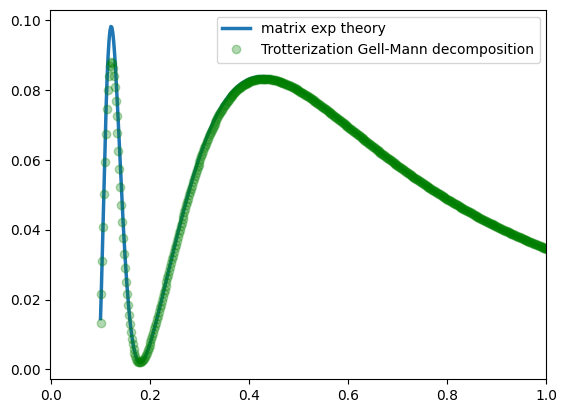

In [161]:
import matplotlib.pyplot as plt


# Your data and plotting code here

plt.plot(Energy, theoe_th, alpha=1,linewidth=2.5)
# plt.plot(Energy, Ge, 'r*', alpha=0.3)
plt.plot(Energy, probe, 'go', alpha=0.3)

# Add legends
plt.legend(["matrix exp theory", "Trotterization Gell-Mann decomposition", "Trotterization from vacuum"])

# plt.xscale('log')
# plt.yscale('log')

plt.xlim(-0.001, 1)
# plt.ylim(-0.001, 0.02)

In [21]:
from scipy.linalg import expm, sinm, cosm

In [40]:
H0 = U1@Evol(1)@U1d
H1 = np.diag([a, 0 , 0])
H = H0+H1
H

array([[ 0.93596592+0.20089677j, -0.07885906+0.2262969j ,
         0.08025153-0.19585266j],
       [-0.07885906+0.2262969j ,  0.90833566+0.31589674j,
         0.07183106-0.11201264j],
       [ 0.08025153-0.19585266j,  0.07183106-0.11201264j,
         0.88870103+0.38432458j]])

In [23]:
Simm@flavor_initial

array([-0.37795074-0.31371417j,  0.58071474-0.26684206j,
        0.45143257+0.38276755j])

In [56]:
np.abs(-0.34361591+0.29018302j)**2

0.20227807870144854

In [57]:
def NeudCPMatter(dCP, initial, matter, sim):
    try:
        if initial == 'e':
            flavor_initial = [1,0,0]
        elif initial == 'm':
            flavor_initial = [0,1,0]
        elif initial == 't':
            flavor_initial = [0,0,1]
    except:
        print('start from e, m, t only')
    t23m, t13m, t12m, D21m, D31m = parameters(matter)
    dCPm = dCP
    c12m = cos(t12m)
    s12m = sin(t12m)
    c13m = cos(t13m)
    s13m = sin(t13m)
    c23m = cos(t23m)
    s23m = sin(t23m)
    
    Um = np.array([[c12m*c13m            , s12m*c13m             , s13m*exp(-1j*dCP)],
               [-s12m*c23m-c12m*s23m*s13m*exp(1j*dCP), c12m*c23m-s12m*s23m*s13m*exp(1j*dCP) , s23m*c13m],
               [s12m*s23m-c12m*c23m*s13m*exp(1j*dCP) , -c12m*s23m-s12m*c23m*s13m*exp(1j*dCP), c23m*c13m]])
    iUm = Um.conj().T

    e_survival1a = []
    mu_survival1a = []
    tau_survival1a = []
    
    for E in sim:
        l = L
        evolmatrix = np.diag([1, exp(-1j*D21m*l/(2*E)), exp(-1j*l*D31m/(2*E))])
        flavor = Um@evolmatrix@iUm@flavor_initial
        e_survival1a.append(np.absolute(flavor[0])**2)
        mu_survival1a.append(np.absolute(flavor[1])**2)
        tau_survival1a.append(np.absolute(flavor[2])**2)
    return e_survival1a, mu_survival1a, tau_survival1a